In [1]:
import leaderbot as lb
data = lb.data.load()

#data['Y'][:, -1] = 0

# model = lb.models.BradleyTerryScaled(data)
model = lb.models.RaoKupper(data, n_tie_factors=0)
# model = lb.models.RaoKupperScaledR(data, n_tie_factors=1)  # best KPCA with n_tie_factor=1
#model = lb.models.RaoKupperScaledRIJ(data, n_tie_factors=1)
# model = lb.models.DavidsonScaled(data, n_tie_factors=2)
#model = lb.models.DavidsonScaledR(data, n_tie_factors=1)
# model = lb.models.DavidsonScaledRIJ(data, n_tie_factors=1)

#model = lb.models.DavidsonScaled(data, n_tie_factors=1)
#model = lb.models.DavidsonFactor(data, n_cov_factors=3, n_tie_factors=3)
#model = lb.models.DavidsonScaled(data, n_tie_factors=0)
#model = lb.models.RaoKupperFactor(data, n_factors=3)
model.train() #method='L-BFGS-B')

latex = False
save = False

In [4]:
loss_const = model.loss(return_jac=False, constraint=True)
loss = model.loss(return_jac=False, constraint=False)
const = loss_const - loss
print(loss)
print(const)

1.009482529730383
0.0


In [5]:
import numpy as np
n = model.n_agents
k = model.n_cov_factors
t = model.n_tie_factors
M = model.param[n * (2):n * (2 + k)].reshape(n, k)

print(k)
print(t)
print(np.sum(M, axis=0))

AttributeError: 'RaoKupper' object has no attribute 'n_cov_factors'

In [6]:
M

NameError: name 'M' is not defined

+---------------------------+--------+--------+---------------+---------------+
|                           |        |    num |   observed    |   predicted   |
| rnk  agent                |  score |  match | win loss  tie | win loss  tie |
+---------------------------+--------+--------+---------------+---------------+
|   1. chatgpt-4o-latest    | +1.510 |  11798 | 53%  23%  24% | 55%  26%  20% | 
|   2. gemini-1.5-pro-ex... | +1.383 |  16700 | 51%  26%  23% | 52%  28%  20% | 
|   3. gpt-4o-2024-05-13    | +1.272 |  66560 | 51%  26%  23% | 52%  28%  20% | 
|   4. gpt-4o-mini-2024-... | +1.217 |  15929 | 46%  29%  25% | 48%  31%  21% | 
|   5. claude-3-5-sonnet... | +1.181 |  40587 | 47%  31%  22% | 48%  32%  21% | 
|   6. gemini-advanced-0514 | +1.146 |  44319 | 49%  29%  22% | 50%  30%  20% | 
|   7. llama-3.1-405b-in... | +1.134 |  15680 | 44%  32%  24% | 45%  34%  21% | 
|   8. gpt-4o-2024-08-06    | +1.126 |   7796 | 43%  32%  25% | 45%  34%  21% | 
|   9. gemini-1.5-pro-ap... | +1

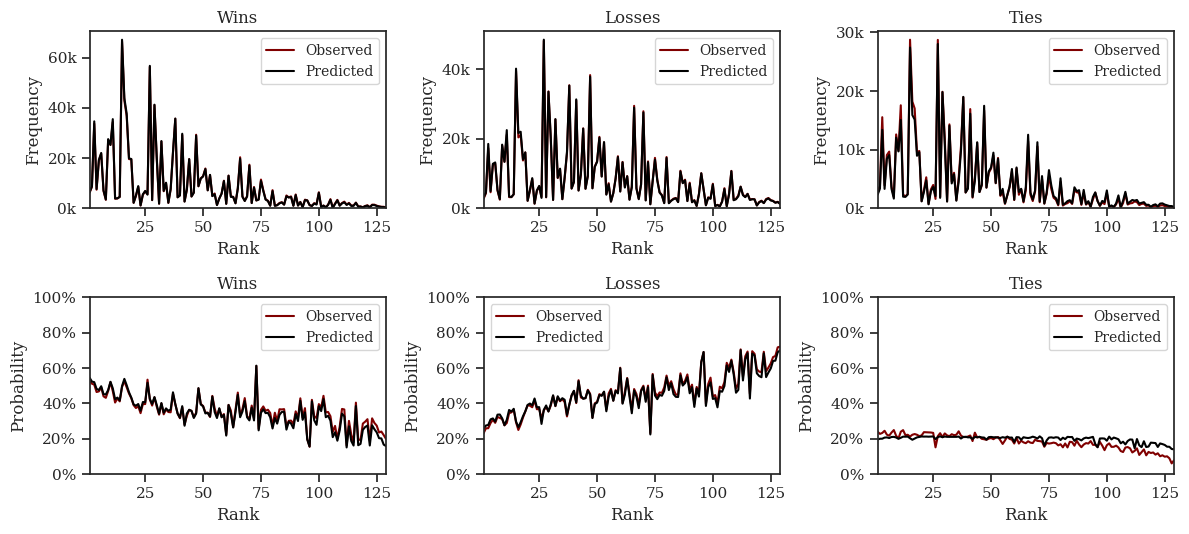

In [7]:
model.leaderboard(max_rank=None, plot=True, latex=latex, save=save)

In [ ]:
#%matplotlib tk
%matplotlib inline
model.visualize(max_rank=40, method='kpca', dim='3d', latex=latex, save=save)

In [ ]:
model.plot_scores(max_rank=30, horizontal=True, latex=latex, save=save)

In [ ]:
model.match_matrix(max_rank=20, density=True, source='both',
                   latex=latex, save=save, horizontal=True,
                   win_range=[0.2, 0.6], tie_range=[0.15, 0.4])

In [ ]:
model.match_matrix(max_rank=20, density=False, source='both',
                   latex=latex, save=save, horizontal=True,
                   win_range=[0, 3000], tie_range=[0, 1500])